In [1]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# The starter code is short and simple, take a look!
from starter import *
from numpy import random

/opt/homebrew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Phase 1 - Create Inputs

In [3]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # TODO add edges to complete the small input
    for i in range(99):
        for j in range(i+1,100):
            G.add_edge(i, j, weight=1000)
    G.add_edge(0,1,weight=1000)
    
def medium(G: nx.Graph):
    # TODO add edges to complete the medium input
    for i in range(2, 300):
        G.add_edge(i, 0, weight=700)
        G.add_edge(i, 1, weight=1000)
    G.add_edge(0,1,weight=800)    
    
def large(G: nx.Graph):
    # TODO add edges to complete the large input
    for i in range(2, 1000):
        G.add_edge(i, 0, weight=500)
        G.add_edge(i, 1, weight=1000)
    G.add_edge(0,1,weight=415)

In [4]:
G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in')

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in')

G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in')

AssertionError: File already exists and overwrite set to False. Move file or set overwrite to True to proceed.

# Phase 2 - Implement your Solver

In [29]:
def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']
    
    # ----- CHANGE PARAMETERS BELOW -----
    inner_loop_choice = G.number_of_nodes() * 10 # outer loop amount
    if G.number_of_nodes() == 1000:
        group_loop_choice = 100 # number of groups we will go up to
    elif G.number_of_nodes() == 300:
        group_loop_choice = 50 # number of groups we will go up to
    elif G.number_of_nodes() == 100:
        group_loop_choice = 20 # number of groups we will go up to
    start_num_groups = 10
    # ----- CHANGE PARAMETERS ABOVE -----
    
    group_score_dict = {} # size group_loop_choice, holds the best group score of each group
        
    for group_num in range(start_num_groups, group_loop_choice):
        print(group_num)
        D = G.copy()

        # ----- Creating an initial randomly generated graph -----
        all_nodes = [i for i in range(D.number_of_nodes())]
        random_nodes = random.choice(all_nodes, size=len(all_nodes), replace=False) # randomly choose from all nodes
        group_counter = 0
        for node in random_nodes:
            D.nodes[node]['team'] = group_counter + 1
            group_counter = (group_counter + 1) % group_num
        
        # ----- Running simulated annealing -----
        # ----- CHANGE PARAMETERS BELOW -----
        T = inner_loop_choice # temperature choice
        if G.number_of_nodes() == 1000:
            cooling_choice = 0.985 # how quickly the temperature will decrease
        elif G.number_of_nodes() == 300:
            cooling_choice = 0.96 # how quickly the temperature will decrease
        elif G.number_of_nodes() == 100:
            cooling_choice = 0.9 # how quickly the temperature will decrease
        # ----- CHANGE PARAMETERS ABOVE -----
        track_D = D
        track_score = score(D)
        for _ in range(inner_loop_choice):
            old_score = track_score # we take the current score
            temp_D = D.copy()
            
            # We randomly move a node
            random_node_choice = random.choice(all_nodes)
            random_team_choice = random.choice(range(1, group_num + 1))
            while temp_D.nodes[random_node_choice]['team'] == random_team_choice:
                random_team_choice = random.choice(range(1, group_num + 1))
            temp_D.nodes[random_node_choice]['team'] = int(random_team_choice)
            
            new_score = score(temp_D) # we calculate our new score
            delta = new_score - old_score
            # We decide whether or not to take in our new score
            if delta < 0:
                D = temp_D
                track_score = new_score
            # The greater delta is, the smaller the chance we will pick temp_D
            elif delta/(T * 1000) < 200 and 1 / math.exp(delta/(T * 1000)) > random.choice(range(100)) / 100:
                D = temp_D
                track_score = new_score
            track_D = D
            T *= cooling_choice
            
        group_score_dict[track_score] = track_D
        
    smallest_G = G
    lowest_score = float('inf')
    for dict_score in group_score_dict:
        if dict_score < lowest_score:
            lowest_score = dict_score
            smallest_G = group_score_dict[dict_score]
            
    for v in range(G.number_of_nodes()):
        G.nodes[v]['team'] = smallest_G.nodes[v]['team']
        
# THINK ABOUT RESETTING, THINK ABOUT ANOTHER INNER LOOP

run_all(solve, 'input', 'output')

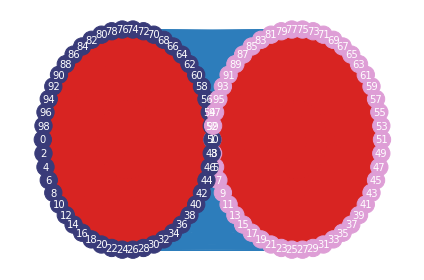

2450272.828182846

In [30]:
G = read_input('small.in')
solve(G)
validate_output(G)
visualize(G)
score(G)

In [31]:
run(solve, 'small.in', 'small.out')

AssertionError: File already exists and overwrite set to False. Move file or set overwrite to True to proceed.

In [ ]:
run_all(solve, 'input', 'output')
tar('output')

  0%|                                           | 2/780 [00:00<03:01,  4.29it/s]

input/large225.in: cost 221386.8281828459
input/small232.in: cost 218574.8281828459


  0%|▏                                          | 3/780 [00:00<03:27,  3.75it/s]

input/large116.in: cost 500272.8281828459


  1%|▏                                          | 4/780 [00:01<07:25,  1.74it/s]

input/large59.in: cost 498292.8281828459


  1%|▎                                          | 5/780 [00:02<07:04,  1.83it/s]

input/small150.in: cost 999577.828182846


  1%|▎                                          | 6/780 [00:05<16:27,  1.28s/it]

input/large147.in: cost 2510807.828182846


  1%|▍                                          | 7/780 [00:05<13:44,  1.07s/it]

input/small101.in: cost 1203564.8281828458


  1%|▍                                          | 9/780 [00:06<08:03,  1.59it/s]

input/small197.in: cost 1120859.8281828458
input/small206.in: cost 350936.8281828459


  1%|▌                                         | 10/780 [00:08<15:54,  1.24s/it]

input/large240.in: cost 2595320.828182846


  1%|▌                                         | 11/780 [00:12<23:31,  1.84s/it]

input/medium7.in: cost 3348232.828182846


  2%|▋                                         | 12/780 [00:12<18:34,  1.45s/it]

input/small257.in: cost 1347364.8281828458


  2%|▋                                         | 13/780 [00:20<44:42,  3.50s/it]

input/large180.in: cost 2471911.828182846


  2%|▋                                       | 14/780 [00:32<1:16:51,  6.02s/it]

input/large211.in: cost 2242808.828182846


  2%|▊                                         | 15/780 [00:33<55:44,  4.37s/it]

input/small135.in: cost 1238263.8281828458


  2%|▉                                         | 17/780 [00:33<28:34,  2.25s/it]

input/small68.in: cost 494943.8281828459
input/medium249.in: cost 272.8281828459045


  2%|▉                                         | 18/780 [00:33<21:15,  1.67s/it]

input/large173.in: cost 224557.8281828459


  2%|█                                         | 19/780 [00:34<16:52,  1.33s/it]

input/small164.in: cost 1058876.8281828458


  3%|█                                         | 20/780 [00:35<14:09,  1.12s/it]

input/medium218.in: cost 215472.8281828459


  3%|█▏                                        | 21/780 [00:35<12:33,  1.01it/s]

input/medium189.in: cost 338764.8281828459
input/small39.in: cost 222352.8281828459


  3%|█▏                                        | 23/780 [00:37<11:27,  1.10it/s]

input/large122.in: cost 272.8281828459045


  3%|█▎                                        | 24/780 [00:37<09:59,  1.26it/s]

input/medium84.in: cost 568115.828182846


  3%|█▎                                        | 25/780 [00:40<16:33,  1.32s/it]

input/medium26.in: cost 2134840.828182846
input/medium77.in: cost 254596.8281828459


  3%|█▍                                        | 27/780 [00:42<13:22,  1.07s/it]

input/medium43.in: cost 1118585.8281828458


  4%|█▌                                        | 29/780 [00:45<15:09,  1.21s/it]

input/medium12.in: cost 2137366.828182846
input/medium53.in: cost 152272.8281828459


  4%|█▌                                        | 30/780 [00:48<21:37,  1.73s/it]

input/medium67.in: cost 3552029.828182846


  4%|█▋                                        | 31/780 [00:50<20:32,  1.65s/it]

input/medium36.in: cost 3228272.828182846


  4%|█▋                                        | 32/780 [00:50<17:21,  1.39s/it]

input/medium94.in: cost 1470272.8281828458


  4%|█▊                                        | 33/780 [00:57<37:26,  3.01s/it]

input/large132.in: cost 2436690.828182846


  4%|█▊                                        | 34/780 [00:58<28:29,  2.29s/it]

input/small174.in: cost 1006153.828182846


  4%|█▉                                        | 35/780 [00:59<22:23,  1.80s/it]

input/small29.in: cost 1321287.8281828458


  5%|█▉                                        | 36/780 [01:00<22:21,  1.80s/it]

input/medium199.in: cost 1132841.8281828458


  5%|█▉                                        | 37/780 [01:01<17:15,  1.39s/it]

input/medium208.in: cost 277698.8281828459


  5%|██                                        | 38/780 [01:03<21:48,  1.76s/it]

input/large163.in: cost 2457860.828182846


  5%|██                                        | 39/780 [01:04<16:14,  1.31s/it]

input/small125.in: cost 291377.8281828459


  5%|██▏                                       | 40/780 [01:05<15:24,  1.25s/it]

input/medium259.in: cost 2164492.828182846


  5%|██▏                                       | 41/780 [01:05<11:55,  1.03it/s]

input/small78.in: cost 1225272.8281828458


  5%|██▎                                       | 42/780 [01:11<29:01,  2.36s/it]

input/large201.in: cost 1040663.828182846


  6%|██▎                                       | 44/780 [01:21<41:16,  3.36s/it]

input/large190.in: cost 3691277.828182846
input/small247.in: cost 306522.8281828459


  6%|██▎                                     | 45/780 [01:34<1:16:23,  6.24s/it]

input/large250.in: cost 2374766.828182846
input/small216.in: cost 241472.8281828459


  6%|██▌                                       | 47/780 [01:35<42:52,  3.51s/it]

input/small187.in: cost 1236900.8281828458


  6%|██▌                                       | 48/780 [01:35<34:04,  2.79s/it]

input/small111.in: cost 1342473.8281828458


  6%|██▌                                     | 49/780 [01:47<1:01:17,  5.03s/it]

input/large157.in: cost 1148583.8281828458


  6%|██▌                                     | 50/780 [01:54<1:07:49,  5.57s/it]

input/large18.in: cost 2334407.828182846


  7%|██▋                                       | 51/780 [01:54<50:38,  4.17s/it]

input/small140.in: cost 1719469.8281828458


  7%|██▋                                     | 52/780 [02:06<1:17:32,  6.39s/it]

input/large49.in: cost 2174412.828182846


  7%|██▊                                       | 53/780 [02:07<57:17,  4.73s/it]

input/large106.in: cost 193657.8281828459


  7%|██▉                                       | 54/780 [02:07<41:33,  3.43s/it]

input/small222.in: cost 2450272.828182846


  7%|██▉                                       | 55/780 [02:09<34:00,  2.81s/it]

input/large235.in: cost 746772.828182846


  7%|███                                       | 56/780 [02:09<25:45,  2.13s/it]

input/small253.in: cost 1021481.828182846


  7%|███                                       | 57/780 [02:11<24:19,  2.02s/it]

input/medium3.in: cost 3616272.828182846


  7%|██▉                                     | 58/780 [02:23<1:00:50,  5.06s/it]

input/large215.in: cost 1215478.8281828458


  8%|███▏                                      | 59/780 [02:25<48:30,  4.04s/it]

input/large184.in: cost 998272.828182846


  8%|███▎                                      | 61/780 [02:25<25:43,  2.15s/it]

input/small202.in: cost 1828255.8281828458
input/small193.in: cost 219635.8281828459


  8%|███▎                                      | 62/780 [02:30<35:22,  2.96s/it]

input/large244.in: cost 1092015.8281828458
input/small160.in: cost 440272.8281828459


  8%|███▍                                      | 64/780 [02:31<21:01,  1.76s/it]

input/large126.in: cost 301426.8281828459


  8%|███▌                                      | 65/780 [02:32<18:21,  1.54s/it]

input/large69.in: cost 272.8281828459045
input/small131.in: cost 256022.8281828459


  9%|███▌                                      | 67/780 [02:35<17:21,  1.46s/it]

input/large38.in: cost 838831.828182846


  9%|███▋                                      | 69/780 [02:46<34:34,  2.92s/it]

input/large177.in: cost 353767.8281828459
input/small236.in: cost 230192.8281828459


  9%|███▊                                      | 70/780 [02:55<52:13,  4.41s/it]

input/large221.in: cost 1562701.8281828458


  9%|███▊                                      | 71/780 [02:56<40:09,  3.40s/it]

input/large143.in: cost 206405.8281828459
input/small58.in: cost 279712.8281828459


  9%|███▉                                      | 73/780 [02:56<23:34,  2.00s/it]

input/small105.in: cost 2340272.828182846


  9%|███▉                                      | 74/780 [03:08<51:16,  4.36s/it]

input/large112.in: cost 2126718.828182846


 10%|████▏                                     | 77/780 [03:12<28:09,  2.40s/it]

input/medium228.in: cost 240826.8281828459
input/small154.in: cost 445272.8281828459
input/medium16.in: cost 253572.8281828459


 10%|████▏                                     | 78/780 [03:12<23:39,  2.02s/it]

input/medium47.in: cost 1450272.8281828458


 10%|████▎                                     | 79/780 [03:15<24:52,  2.13s/it]

input/medium80.in: cost 1705471.8281828458


 10%|████▎                                     | 80/780 [03:18<27:59,  2.40s/it]

input/medium73.in: cost 2284541.828182846


 10%|████▎                                     | 81/780 [03:19<23:28,  2.02s/it]

input/medium22.in: cost 213178.8281828459


 11%|████▍                                     | 82/780 [03:20<18:45,  1.61s/it]

input/medium32.in: cost 2790272.828182846


 11%|████▍                                     | 83/780 [03:20<15:49,  1.36s/it]

input/medium63.in: cost 436840.8281828459


 11%|████▌                                     | 84/780 [03:21<12:21,  1.07s/it]

input/medium90.in: cost 630272.828182846


 11%|████▌                                     | 85/780 [03:21<10:55,  1.06it/s]

input/medium57.in: cost 391642.8281828459


 11%|████▋                                     | 86/780 [03:22<09:49,  1.18it/s]

input/small19.in: cost 1705417.8281828458


 11%|████▋                                     | 87/780 [03:22<08:00,  1.44it/s]

input/medium238.in: cost 199069.8281828459


 11%|████▋                                     | 88/780 [03:23<07:48,  1.48it/s]

input/small144.in: cost 1627809.8281828458


 11%|████▊                                     | 89/780 [03:35<46:06,  4.00s/it]

input/large102.in: cost 2184852.828182846


 12%|████▊                                     | 90/780 [03:35<34:25,  2.99s/it]

input/small48.in: cost 1192498.8281828458
input/small115.in: cost 282272.8281828459


 12%|████▉                                     | 92/780 [03:39<27:48,  2.43s/it]

input/large153.in: cost 1460671.8281828458


 12%|█████                                     | 93/780 [03:39<21:37,  1.89s/it]

input/large231.in: cost 260932.8281828459
input/small226.in: cost 282272.8281828459


 12%|█████                                     | 95/780 [03:51<40:31,  3.55s/it]

input/large260.in: cost 3535869.828182846


 12%|████▉                                   | 96/780 [04:03<1:02:11,  5.46s/it]

input/large167.in: cost 2386431.828182846


 12%|█████▏                                    | 97/780 [04:06<55:11,  4.85s/it]

input/large28.in: cost 634736.828182846
input/small121.in: cost 489272.8281828459


 13%|█████▎                                    | 99/780 [04:14<51:51,  4.57s/it]

input/large79.in: cost 4970272.828182846


 13%|█████▎                                   | 100/780 [04:15<42:17,  3.73s/it]

input/large136.in: cost 270808.8281828459


 13%|█████▎                                   | 101/780 [04:15<32:58,  2.91s/it]

input/small170.in: cost 796115.828182846


 13%|█████▍                                   | 103/780 [04:22<32:57,  2.92s/it]

input/large254.in: cost 2416470.828182846
input/small183.in: cost 4272.828182845905


 13%|█████▍                                   | 104/780 [04:23<25:45,  2.29s/it]

input/small212.in: cost 1824779.8281828458


 13%|█████▌                                   | 105/780 [04:24<21:57,  1.95s/it]

input/large194.in: cost 412530.8281828459


 14%|█████▌                                   | 106/780 [04:36<54:18,  4.83s/it]

input/large205.in: cost 2146038.828182846


 14%|█████▌                                   | 107/780 [04:36<39:19,  3.51s/it]

input/small243.in: cost 2160872.828182846


 14%|█████▋                                   | 108/780 [04:40<38:01,  3.40s/it]

input/medium2.in: cost 3949591.828182846


 14%|█████▋                                   | 109/780 [04:40<28:42,  2.57s/it]

input/small252.in: cost 1172824.8281828458


 14%|█████▊                                   | 110/780 [04:43<29:00,  2.60s/it]

input/large185.in: cost 2460611.828182846


 14%|█████▊                                   | 111/780 [04:54<58:54,  5.28s/it]

input/large214.in: cost 3265088.828182846


 14%|█████▉                                   | 112/780 [04:55<43:17,  3.89s/it]

input/small192.in: cost 311632.8281828459


 14%|█████▉                                   | 113/780 [04:55<31:19,  2.82s/it]

input/small203.in: cost 2450272.828182846


 15%|█████▉                                   | 114/780 [04:56<23:12,  2.09s/it]

input/large245.in: cost 145948.8281828459


 15%|██████                                   | 115/780 [04:56<17:31,  1.58s/it]

input/small161.in: cost 665409.828182846


 15%|██████                                   | 116/780 [04:59<21:05,  1.91s/it]

input/large68.in: cost 575361.828182846


 15%|██████▏                                  | 117/780 [05:01<22:48,  2.06s/it]

input/large127.in: cost 492332.8281828459


 15%|██████▏                                  | 118/780 [05:02<18:11,  1.65s/it]

input/small130.in: cost 727922.828182846


 15%|██████▎                                  | 119/780 [05:04<20:43,  1.88s/it]

input/large176.in: cost 579034.828182846


 15%|██████▎                                  | 120/780 [05:05<16:18,  1.48s/it]

input/large39.in: cost 216607.8281828459


 16%|██████▎                                  | 121/780 [05:05<13:20,  1.21s/it]

input/small237.in: cost 1132923.8281828458


 16%|██████▍                                  | 122/780 [05:18<49:26,  4.51s/it]

input/large220.in: cost 2132075.828182846


 16%|██████▍                                  | 123/780 [05:20<43:13,  3.95s/it]

input/large142.in: cost 4950322.828182846


 16%|██████▌                                  | 124/780 [05:21<31:48,  2.91s/it]

input/small104.in: cost 1203911.8281828458


 16%|██████▌                                  | 125/780 [05:21<23:15,  2.13s/it]

input/small59.in: cost 2450272.828182846


 16%|██████▌                                  | 126/780 [05:25<30:34,  2.81s/it]

input/large113.in: cost 2484855.828182846


 16%|██████▋                                  | 128/780 [05:26<16:03,  1.48s/it]

input/small155.in: cost 641785.828182846
input/medium229.in: cost 1272.8281828459044


 17%|██████▊                                  | 129/780 [05:29<22:08,  2.04s/it]

input/medium17.in: cost 2724482.828182846
input/medium46.in: cost 248272.8281828459


 17%|██████▉                                  | 131/780 [05:30<14:19,  1.32s/it]

input/medium81.in: cost 249822.8281828459


 17%|██████▉                                  | 132/780 [05:31<11:36,  1.07s/it]

input/medium72.in: cost 209697.8281828459


 17%|██████▉                                  | 133/780 [05:31<09:07,  1.18it/s]

input/medium23.in: cost 427585.8281828459


 17%|███████                                  | 134/780 [05:32<11:40,  1.08s/it]

input/medium33.in: cost 4162272.828182846


 17%|███████                                  | 135/780 [05:36<19:18,  1.80s/it]

input/medium62.in: cost 2363639.828182846


 17%|███████▏                                 | 136/780 [05:36<14:39,  1.37s/it]

input/medium91.in: cost 224116.8281828459


 18%|███████▎                                 | 138/780 [05:38<11:08,  1.04s/it]

input/medium56.in: cost 1045392.828182846
input/small145.in: cost 219957.8281828459


 18%|███████▎                                 | 140/780 [05:39<06:50,  1.56it/s]

input/medium239.in: cost 237474.8281828459
input/small18.in: cost 549225.828182846


 18%|███████▍                                 | 141/780 [05:51<43:31,  4.09s/it]

input/large103.in: cost 2028428.8281828458


 18%|███████▍                                 | 142/780 [05:51<32:39,  3.07s/it]

input/small114.in: cost 2368197.828182846


 18%|███████▌                                 | 143/780 [05:52<23:50,  2.25s/it]

input/small49.in: cost 617672.828182846


 18%|███████▌                                 | 144/780 [05:53<21:49,  2.06s/it]

input/large152.in: cost 400931.8281828459


 19%|███████▌                                 | 145/780 [05:54<16:49,  1.59s/it]

input/large230.in: cost 500272.8281828459


 19%|███████▋                                 | 146/780 [05:55<13:45,  1.30s/it]

input/small227.in: cost 1234264.8281828458


 19%|███████▋                                 | 147/780 [06:06<47:29,  4.50s/it]

input/large29.in: cost 2417342.828182846


 19%|███████▊                                 | 148/780 [06:13<53:38,  5.09s/it]

input/large166.in: cost 1634447.8281828458


 19%|███████▊                                 | 149/780 [06:13<38:28,  3.66s/it]

input/small120.in: cost 2450272.828182846


 19%|███████▉                                 | 150/780 [06:19<44:39,  4.25s/it]

input/large137.in: cost 1171395.8281828458


 19%|███████▉                                 | 151/780 [06:27<57:30,  5.49s/it]

input/large78.in: cost 30272.828182845904


 19%|███████▉                                 | 152/780 [06:28<41:03,  3.92s/it]

input/small171.in: cost 1825272.8281828458


 20%|████████                                 | 153/780 [06:36<54:42,  5.24s/it]

input/large255.in: cost 1429894.8281828458


 20%|████████                                 | 154/780 [06:36<40:07,  3.85s/it]

input/small213.in: cost 1312356.8281828458


 20%|████████▏                                | 155/780 [06:37<29:49,  2.86s/it]

input/small182.in: cost 1686631.8281828458


 20%|████████▏                                | 156/780 [06:37<21:48,  2.10s/it]

input/large204.in: cost 266902.8281828459


 20%|████████▎                                | 157/780 [06:49<51:38,  4.97s/it]

input/large195.in: cost 2114294.828182846


 20%|████████▎                                | 158/780 [06:50<38:06,  3.68s/it]

input/small242.in: cost 1196541.8281828458


 21%|████████▍                                | 160/780 [06:53<25:04,  2.43s/it]

input/large224.in: cost 1086798.8281828458
input/small233.in: cost 230837.8281828459


 21%|████████▍                                | 161/780 [06:53<19:32,  1.89s/it]

input/large58.in: cost 118372.8281828459


 21%|████████▌                                | 162/780 [06:54<16:30,  1.60s/it]

input/large117.in: cost 250022.8281828459


 21%|████████▌                                | 163/780 [06:55<13:26,  1.31s/it]

input/small151.in: cost 1594643.8281828458


 21%|████████▌                                | 164/780 [07:01<29:07,  2.84s/it]

input/large146.in: cost 2094452.8281828458


 21%|████████▋                                | 165/780 [07:01<21:18,  2.08s/it]

input/small100.in: cost 2450272.828182846
input/small207.in: cost 207783.8281828459


 21%|████████▊                                | 167/780 [07:02<12:58,  1.27s/it]

input/small196.in: cost 1179398.8281828458


 22%|████████▉                                | 169/780 [07:03<08:18,  1.22it/s]

input/large241.in: cost 433500.8281828459
input/small256.in: cost 1250272.8281828458


 22%|████████▉                                | 170/780 [07:03<06:22,  1.60it/s]

input/medium6.in: cost 269922.8281828459


 22%|████████▉                                | 171/780 [07:03<06:25,  1.58it/s]

input/large210.in: cost 215130.8281828459


 22%|█████████                                | 172/780 [07:08<19:04,  1.88s/it]

input/large181.in: cost 4895372.828182846


 22%|█████████▏                               | 174/780 [07:12<17:06,  1.69s/it]

input/medium248.in: cost 2488955.828182846
input/small69.in: cost 625272.828182846


 22%|█████████▏                               | 175/780 [07:13<13:54,  1.38s/it]

input/small134.in: cost 1199782.8281828458


 23%|█████████▎                               | 176/780 [07:15<16:31,  1.64s/it]

input/large172.in: cost 485482.8281828459


 23%|█████████▎                               | 177/780 [07:16<13:28,  1.34s/it]

input/small38.in: cost 1149643.8281828458


 23%|█████████▎                               | 178/780 [07:18<17:32,  1.75s/it]

input/medium188.in: cost 281455.8281828459


 23%|█████████▍                               | 179/780 [07:22<22:22,  2.23s/it]

input/medium219.in: cost 3074908.828182846


 23%|█████████▍                               | 180/780 [07:22<17:17,  1.73s/it]

input/small165.in: cost 1005676.828182846


 23%|█████████▌                               | 181/780 [07:34<46:13,  4.63s/it]

input/large123.in: cost 2231444.828182846


 23%|█████████▌                               | 182/780 [07:35<35:44,  3.59s/it]

input/medium85.in: cost 300672.8281828459


 23%|█████████▌                               | 183/780 [07:38<35:42,  3.59s/it]

input/medium27.in: cost 2289162.828182846


 24%|█████████▋                               | 184/780 [07:40<29:39,  2.99s/it]

input/medium76.in: cost 985517.828182846


 24%|█████████▋                               | 185/780 [07:41<24:37,  2.48s/it]

input/medium42.in: cost 4500272.828182846


 24%|█████████▊                               | 186/780 [07:44<25:22,  2.56s/it]

input/medium13.in: cost 2579227.828182846


 24%|█████████▊                               | 187/780 [07:47<26:53,  2.72s/it]

input/medium52.in: cost 2057412.8281828458


 24%|█████████▉                               | 188/780 [07:48<21:04,  2.14s/it]

input/medium66.in: cost 4260272.828182846


 24%|█████████▉                               | 189/780 [07:50<20:26,  2.08s/it]

input/medium37.in: cost 1349592.8281828458


 24%|█████████▉                               | 190/780 [07:53<22:53,  2.33s/it]

input/medium95.in: cost 3018200.828182846


 24%|██████████                               | 191/780 [07:53<17:36,  1.79s/it]

input/large133.in: cost 196039.8281828459


 25%|██████████                               | 192/780 [07:56<19:35,  2.00s/it]

input/medium209.in: cost 2955107.828182846


 25%|██████████▏                              | 193/780 [07:59<23:47,  2.43s/it]

input/medium198.in: cost 3066571.828182846


 25%|██████████▏                              | 194/780 [08:00<18:20,  1.88s/it]

input/small28.in: cost 1206274.8281828458


 25%|██████████▎                              | 195/780 [08:00<14:03,  1.44s/it]

input/small175.in: cost 974083.828182846


 25%|██████████▎                              | 196/780 [08:02<14:34,  1.50s/it]

input/large162.in: cost 2618272.828182846
input/small79.in: cost 470272.8281828459


 25%|██████████▍                              | 198/780 [08:02<08:29,  1.14it/s]

input/medium258.in: cost 750272.828182846


 26%|██████████▍                              | 199/780 [08:03<07:40,  1.26it/s]

input/small124.in: cost 1500606.8281828458


 26%|██████████▌                              | 200/780 [08:05<11:41,  1.21s/it]

input/large191.in: cost 400272.8281828459


 26%|██████████▌                              | 202/780 [08:08<11:24,  1.18s/it]

input/large200.in: cost 1019772.828182846
input/small246.in: cost 250272.8281828459


 26%|██████████▋                              | 204/780 [08:15<20:27,  2.13s/it]

input/large251.in: cost 306444.8281828459
input/small186.in: cost 249819.8281828459


 26%|██████████▊                              | 205/780 [08:16<15:53,  1.66s/it]

input/small217.in: cost 1019053.828182846


 26%|██████████▊                              | 206/780 [08:16<12:02,  1.26s/it]

input/small110.in: cost 2450272.828182846


 27%|██████████▉                              | 207/780 [08:19<15:46,  1.65s/it]

input/large19.in: cost 3462999.828182846


 27%|██████████▉                              | 209/780 [08:20<09:42,  1.02s/it]

input/large156.in: cost 499272.8281828459
input/small141.in: cost 228924.8281828459


 27%|███████████                              | 210/780 [08:22<13:57,  1.47s/it]

input/large107.in: cost 4900272.828182846


 27%|███████████                              | 211/780 [08:25<17:06,  1.80s/it]

input/large48.in: cost 2505740.828182846


 27%|███████████▏                             | 212/780 [08:25<13:41,  1.45s/it]

input/small223.in: cost 1832689.8281828458


 27%|███████████▏                             | 213/780 [08:37<42:12,  4.47s/it]

input/large234.in: cost 4148030.828182846


 27%|███████████▏                             | 214/780 [08:40<38:46,  4.11s/it]

input/medium49.in: cost 2082346.8281828458


 28%|███████████▎                             | 215/780 [08:42<31:01,  3.29s/it]

input/medium18.in: cost 1006195.828182846


 28%|███████████▎                             | 216/780 [08:42<24:08,  2.57s/it]

input/large53.in: cost 272.8281828459045


 28%|███████████▍                             | 217/780 [08:44<22:16,  2.37s/it]

input/medium226.in: cost 1233027.8281828458
input/small56.in: cost 273678.8281828459


 28%|███████████▌                             | 219/780 [08:45<12:54,  1.38s/it]

input/medium115.in: cost 239872.8281828459


 28%|███████████▌                             | 221/780 [08:49<13:47,  1.48s/it]

input/medium144.in: cost 1464672.8281828458
input/small238.in: cost 218598.8281828459


 28%|███████████▋                             | 222/780 [08:50<13:21,  1.44s/it]

input/medium243.in: cost 3660272.828182846


 29%|███████████▋                             | 223/780 [08:51<11:13,  1.21s/it]

input/small62.in: cost 1176611.8281828458


 29%|███████████▊                             | 225/780 [08:52<08:02,  1.15it/s]

input/large179.in: cost 483072.8281828459
input/large36.in: cost 240272.8281828459


 29%|███████████▉                             | 226/780 [08:52<07:34,  1.22it/s]

input/medium183.in: cost 1535272.8281828458


 29%|███████████▉                             | 227/780 [08:53<06:09,  1.50it/s]

input/small33.in: cost 2450272.828182846


 29%|███████████▉                             | 228/780 [08:54<08:22,  1.10it/s]

input/medium212.in: cost 1408218.8281828458


 29%|████████████                             | 229/780 [09:06<37:47,  4.11s/it]

input/large67.in: cost 3724774.828182846


 29%|████████████                             | 230/780 [09:07<28:17,  3.09s/it]

input/large128.in: cost 230288.8281828459


 30%|████████████▏                            | 231/780 [09:08<24:10,  2.64s/it]

input/medium170.in: cost 1126496.8281828458


 30%|████████████▏                            | 232/780 [09:16<39:30,  4.33s/it]

input/large94.in: cost 4970272.828182846


 30%|████████████▏                            | 233/780 [09:17<29:41,  3.26s/it]

input/medium121.in: cost 4050272.828182846
input/small91.in: cost 221588.8281828459


 30%|████████████▎                            | 235/780 [09:18<17:06,  1.88s/it]

input/small1.in: cost 1603971.8281828458


 30%|████████████▍                            | 236/780 [09:18<13:31,  1.49s/it]

input/small81.in: cost 250172.8281828459


 30%|████████████▍                            | 237/780 [09:20<15:25,  1.70s/it]

input/medium131.in: cost 3933793.828182846


 31%|████████████▌                            | 238/780 [09:29<32:40,  3.62s/it]

input/large84.in: cost 4713197.828182846


 31%|████████████▌                            | 239/780 [09:30<25:16,  2.80s/it]

input/medium160.in: cost 1270272.8281828458


 31%|████████████▌                            | 240/780 [09:42<48:36,  5.40s/it]

input/large138.in: cost 2371792.828182846


 31%|████████████▋                            | 241/780 [09:42<35:22,  3.94s/it]

input/large77.in: cost 300553.8281828459


 31%|████████████▋                            | 242/780 [09:45<33:53,  3.78s/it]

input/medium202.in: cost 2888307.828182846
input/small23.in: cost 406535.8281828459


 31%|████████████▊                            | 244/780 [09:46<18:51,  2.11s/it]

input/medium193.in: cost 235227.8281828459


 31%|████████████▉                            | 245/780 [10:00<45:07,  5.06s/it]

input/large26.in: cost 2182449.828182846


 32%|████████████▉                            | 247/780 [10:14<47:49,  5.38s/it]

input/large169.in: cost 2143815.828182846
input/small72.in: cost 290346.8281828459


 32%|█████████████                            | 249/780 [10:17<30:46,  3.48s/it]

input/medium253.in: cost 2035828.8281828458
input/medium154.in: cost 414272.8281828459


 32%|█████████████▏                           | 250/780 [10:17<22:08,  2.51s/it]

input/small228.in: cost 223948.8281828459


 32%|█████████████▏                           | 251/780 [10:19<19:48,  2.25s/it]

input/medium105.in: cost 272.8281828459045


 32%|█████████████▏                           | 252/780 [10:19<15:13,  1.73s/it]

input/small46.in: cost 2448988.828182846


 32%|█████████████▎                           | 253/780 [10:30<38:16,  4.36s/it]

input/large12.in: cost 1949591.8281828458


 33%|█████████████▎                           | 254/780 [10:30<27:36,  3.15s/it]

input/small17.in: cost 644235.828182846


 33%|█████████████▍                           | 255/780 [10:31<20:26,  2.34s/it]

input/medium236.in: cost 244045.8281828459


 33%|█████████████▍                           | 256/780 [10:31<15:02,  1.72s/it]

input/large43.in: cost 500165.87212707003


 33%|█████████████▌                           | 257/780 [10:34<18:59,  2.18s/it]

input/medium59.in: cost 2554226.828182846


 33%|█████████████▌                           | 258/780 [10:45<42:28,  4.88s/it]

input/large4.in: cost 2156374.828182846


 33%|█████████████▌                           | 259/780 [10:46<31:40,  3.65s/it]

input/medium79.in: cost 1470272.8281828458


 33%|█████████████▋                           | 260/780 [10:49<30:18,  3.50s/it]

input/medium28.in: cost 2065984.8281828458


 33%|█████████████▋                           | 261/780 [10:50<23:20,  2.70s/it]

input/medium216.in: cost 1477272.8281828458


 34%|█████████████▊                           | 262/780 [10:53<24:30,  2.84s/it]

input/medium187.in: cost 2191046.828182846


 34%|█████████████▊                           | 263/780 [10:54<17:54,  2.08s/it]

input/small37.in: cost 616744.828182846


 34%|█████████████▉                           | 265/780 [11:02<23:55,  2.79s/it]

input/large63.in: cost 1487788.8281828458
input/small66.in: cost 1202272.8281828458


 34%|█████████████▉                           | 266/780 [11:05<25:18,  2.95s/it]

input/medium247.in: cost 779313.828182846


 34%|██████████████                           | 268/780 [11:07<15:00,  1.76s/it]

input/large32.in: cost 126671.8281828459
input/small259.in: cost 403127.8281828459


 34%|██████████████▏                          | 269/780 [11:09<15:45,  1.85s/it]

input/medium125.in: cost 272.8281828459045


 35%|██████████████▏                          | 270/780 [11:09<12:07,  1.43s/it]

input/small95.in: cost 1126445.8281828458


 35%|██████████████▏                          | 271/780 [11:12<16:07,  1.90s/it]

input/medium9.in: cost 2269170.828182846


 35%|██████████████▎                          | 272/780 [11:13<12:46,  1.51s/it]

input/small199.in: cost 1178752.8281828458


 35%|██████████████▎                          | 273/780 [11:13<09:35,  1.14s/it]

input/small208.in: cost 405202.8281828459


 35%|██████████████▍                          | 274/780 [11:16<14:26,  1.71s/it]

input/medium174.in: cost 2092411.8281828458


 35%|██████████████▍                          | 275/780 [11:19<16:09,  1.92s/it]

input/large90.in: cost 777952.828182846


 35%|██████████████▌                          | 276/780 [11:19<12:45,  1.52s/it]

input/large149.in: cost 1034272.828182846


 36%|██████████████▌                          | 277/780 [11:20<10:18,  1.23s/it]

input/small52.in: cost 1016897.828182846


 36%|██████████████▌                          | 278/780 [11:24<18:17,  2.19s/it]

input/large57.in: cost 816366.828182846


 36%|██████████████▋                          | 279/780 [11:26<18:37,  2.23s/it]

input/large118.in: cost 2472489.828182846


 36%|██████████████▋                          | 280/780 [11:27<14:54,  1.79s/it]

input/medium222.in: cost 4260272.828182846


 36%|██████████████▊                          | 281/780 [11:30<18:26,  2.22s/it]

input/medium140.in: cost 2934547.828182846


 36%|██████████████▊                          | 282/780 [11:34<22:15,  2.68s/it]

input/medium111.in: cost 3055079.828182846


 36%|██████████████▉                          | 283/780 [11:38<23:59,  2.90s/it]

input/medium101.in: cost 2267961.828182846


 36%|██████████████▉                          | 284/780 [11:41<25:28,  3.08s/it]

input/medium150.in: cost 2463331.828182846


 37%|██████████████▉                          | 285/780 [11:42<19:07,  2.32s/it]

input/medium232.in: cost 303382.8281828459


 37%|███████████████                          | 286/780 [11:42<15:02,  1.83s/it]

input/small13.in: cost 2033772.8281828458


 37%|███████████████                          | 287/780 [11:43<11:12,  1.36s/it]

input/large108.in: cost 500165.87212707003


 37%|███████████████▏                         | 288/780 [11:51<28:26,  3.47s/it]

input/large47.in: cost 4950272.828182846


 37%|███████████████▏                         | 289/780 [11:52<21:25,  2.62s/it]

input/small42.in: cost 954684.828182846


 37%|███████████████▏                         | 290/780 [11:52<16:19,  2.00s/it]

input/large16.in: cost 748772.828182846


 37%|███████████████▎                         | 291/780 [11:53<13:27,  1.65s/it]

input/large159.in: cost 309346.8281828459


 37%|███████████████▎                         | 292/780 [12:01<27:45,  3.41s/it]

input/large80.in: cost 1326711.8281828458


 38%|███████████████▍                         | 293/780 [12:01<20:10,  2.48s/it]

input/small218.in: cost 48942.82818284591


 38%|███████████████▍                         | 294/780 [12:01<14:40,  1.81s/it]

input/small189.in: cost 293272.8281828459


 38%|███████████████▌                         | 295/780 [12:04<16:50,  2.08s/it]

input/medium164.in: cost 2620262.828182846


 38%|███████████████▌                         | 296/780 [12:04<13:07,  1.63s/it]

input/small5.in: cost 263659.8281828459
input/small249.in: cost 185272.8281828459


 38%|███████████████▋                         | 298/780 [12:05<07:35,  1.06it/s]

input/small85.in: cost 312872.8281828459


 38%|███████████████▋                         | 299/780 [12:08<12:05,  1.51s/it]

input/medium135.in: cost 2144568.828182846


 38%|███████████████▊                         | 300/780 [12:11<15:07,  1.89s/it]

input/large22.in: cost 237125.8281828459


 39%|███████████████▊                         | 301/780 [12:14<18:38,  2.33s/it]

input/medium257.in: cost 2600174.828182846


 39%|███████████████▊                         | 302/780 [12:15<14:47,  1.86s/it]

input/small76.in: cost 1185127.8281828458


 39%|███████████████▉                         | 303/780 [12:25<32:46,  4.12s/it]

input/large73.in: cost 1961827.8281828458


 39%|███████████████▉                         | 304/780 [12:25<24:23,  3.07s/it]

input/small27.in: cost 1652729.8281828458


 39%|████████████████                         | 305/780 [12:26<18:45,  2.37s/it]

input/medium197.in: cost 1921229.8281828458


 39%|████████████████                         | 306/780 [12:26<14:07,  1.79s/it]

input/medium206.in: cost 500875.8281828459


 39%|████████████████▏                        | 308/780 [12:30<12:42,  1.62s/it]

input/medium38.in: cost 473017.8281828459
input/medium69.in: cost 272.8281828459045


 40%|████████████████▏                        | 309/780 [12:39<30:43,  3.91s/it]

input/large5.in: cost 885740.828182846


 40%|████████████████▎                        | 310/780 [12:42<29:08,  3.72s/it]

input/medium78.in: cost 210522.8281828459


 40%|████████████████▎                        | 311/780 [12:46<28:38,  3.66s/it]

input/medium29.in: cost 3498063.828182846


 40%|████████████████▍                        | 312/780 [12:46<20:44,  2.66s/it]

input/small36.in: cost 2205272.828182846


 40%|████████████████▍                        | 313/780 [12:48<18:11,  2.34s/it]

input/medium186.in: cost 1126315.8281828458


 40%|████████████████▌                        | 314/780 [12:51<20:23,  2.63s/it]

input/medium217.in: cost 2169649.828182846


 40%|████████████████▌                        | 315/780 [13:03<41:50,  5.40s/it]

input/large62.in: cost 2230248.828182846


 41%|████████████████▌                        | 316/780 [13:03<29:44,  3.85s/it]

input/medium246.in: cost 254040.8281828459


 41%|████████████████▋                        | 317/780 [13:04<22:02,  2.86s/it]

input/small67.in: cost 1778880.8281828458


 41%|████████████████▋                        | 318/780 [13:10<29:38,  3.85s/it]

input/large33.in: cost 4442272.828182846


 41%|████████████████▊                        | 319/780 [13:13<27:35,  3.59s/it]

input/medium8.in: cost 2179116.828182846
input/small94.in: cost 470272.8281828459


 41%|████████████████▉                        | 322/780 [13:16<15:14,  2.00s/it]

input/medium124.in: cost 2855506.828182846
input/small258.in: cost 1250272.8281828458


 42%|█████████████████                        | 324/780 [13:18<11:49,  1.56s/it]

input/medium175.in: cost 1499490.8281828458
input/small209.in: cost 562674.828182846


 42%|█████████████████                        | 325/780 [13:19<09:08,  1.21s/it]

input/small198.in: cost 2450272.828182846


 42%|█████████████████▏                       | 326/780 [13:20<08:43,  1.15s/it]

input/large91.in: cost 235031.8281828459


 42%|█████████████████▏                       | 327/780 [13:21<09:03,  1.20s/it]

input/large148.in: cost 1242772.8281828458
input/small53.in: cost 645272.828182846


 42%|█████████████████▎                       | 329/780 [13:30<19:11,  2.55s/it]

input/large119.in: cost 1667500.8281828458


 42%|█████████████████▎                       | 330/780 [13:41<35:33,  4.74s/it]

input/large56.in: cost 2165731.828182846


 42%|█████████████████▍                       | 331/780 [13:43<29:55,  4.00s/it]

input/medium223.in: cost 2780261.828182846


 43%|█████████████████▍                       | 332/780 [13:43<22:26,  3.01s/it]

input/medium141.in: cost 214122.8281828459


 43%|█████████████████▌                       | 333/780 [13:43<16:38,  2.23s/it]

input/medium110.in: cost 1250272.8281828458


 43%|█████████████████▌                       | 334/780 [13:45<15:35,  2.10s/it]

input/medium100.in: cost 4470272.828182846


 43%|█████████████████▌                       | 335/780 [13:48<17:53,  2.41s/it]

input/medium151.in: cost 2285610.828182846
input/small12.in: cost 107670.8281828459


 43%|█████████████████▋                       | 337/780 [13:52<15:08,  2.05s/it]

input/medium233.in: cost 2295942.828182846


 43%|█████████████████▊                       | 338/780 [13:52<11:55,  1.62s/it]

input/large46.in: cost 500165.87212707003


 43%|█████████████████▊                       | 339/780 [14:00<24:38,  3.35s/it]

input/large109.in: cost 1509746.8281828458


 44%|█████████████████▊                       | 340/780 [14:01<18:33,  2.53s/it]

input/small43.in: cost 2450272.828182846


 44%|█████████████████▉                       | 341/780 [14:12<35:57,  4.91s/it]

input/large158.in: cost 877337.828182846


 44%|█████████████████▉                       | 342/780 [14:23<49:13,  6.74s/it]

input/large17.in: cost 2396834.828182846


 44%|██████████████████                       | 343/780 [14:26<40:20,  5.54s/it]

input/large81.in: cost 250122.8281828459


 44%|██████████████████                       | 344/780 [14:28<34:43,  4.78s/it]

input/medium165.in: cost 2054268.8281828458


 44%|██████████████████▏                      | 345/780 [14:29<25:48,  3.56s/it]

input/small188.in: cost 2388071.828182846


 44%|██████████████████▏                      | 346/780 [14:30<19:15,  2.66s/it]

input/small219.in: cost 1556840.8281828458


 44%|██████████████████▏                      | 347/780 [14:30<14:51,  2.06s/it]

input/small4.in: cost 1185665.8281828458


 45%|██████████████████▎                      | 348/780 [14:31<12:30,  1.74s/it]

input/medium134.in: cost 2449853.828182846
input/small84.in: cost 264215.8281828459


 45%|██████████████████▍                      | 350/780 [14:32<07:47,  1.09s/it]

input/small248.in: cost 1306410.8281828458


 45%|██████████████████▍                      | 351/780 [14:32<06:51,  1.04it/s]

input/large23.in: cost 419943.8281828459
input/small77.in: cost 246789.8281828459


 45%|██████████████████▌                      | 353/780 [14:33<04:17,  1.66it/s]

input/medium256.in: cost 272.8281828459045


 45%|██████████████████▌                      | 354/780 [14:34<05:31,  1.28it/s]

input/large72.in: cost 347302.8281828459


 46%|██████████████████▋                      | 355/780 [14:35<05:02,  1.40it/s]

input/medium207.in: cost 197343.8281828459


 46%|██████████████████▋                      | 356/780 [14:38<09:53,  1.40s/it]

input/medium196.in: cost 2167405.828182846


 46%|██████████████████▊                      | 357/780 [14:39<08:22,  1.19s/it]

input/small26.in: cost 1177395.8281828458


 46%|██████████████████▊                      | 358/780 [14:39<06:25,  1.09it/s]

input/medium39.in: cost 214070.8281828459


 46%|██████████████████▊                      | 359/780 [14:40<08:04,  1.15s/it]

input/medium68.in: cost 1048846.8281828458


 46%|██████████████████▉                      | 360/780 [14:41<07:37,  1.09s/it]

input/medium48.in: cost 2364038.828182846


 46%|██████████████████▉                      | 361/780 [14:50<23:12,  3.32s/it]

input/large1.in: cost 2843662.828182846


 46%|███████████████████                      | 362/780 [14:51<18:09,  2.61s/it]

input/medium19.in: cost 3264077.828182846


 47%|███████████████████▏                     | 364/780 [15:03<25:49,  3.73s/it]

input/large52.in: cost 2143004.828182846
input/medium227.in: cost 298272.8281828459


 47%|███████████████████▏                     | 365/780 [15:03<18:33,  2.68s/it]

input/small57.in: cost 254554.8281828459


 47%|███████████████████▏                     | 366/780 [15:04<14:41,  2.13s/it]

input/medium114.in: cost 674922.828182846
input/small239.in: cost 251248.8281828459


 47%|███████████████████▍                     | 369/780 [15:05<07:16,  1.06s/it]

input/medium145.in: cost 1145870.8281828458
input/small63.in: cost 241462.8281828459


 47%|███████████████████▍                     | 370/780 [15:09<12:34,  1.84s/it]

input/medium242.in: cost 2387762.828182846


 48%|███████████████████▌                     | 371/780 [15:13<17:03,  2.50s/it]

input/large37.in: cost 871372.828182846


 48%|███████████████████▌                     | 372/780 [15:13<12:54,  1.90s/it]

input/large178.in: cost 210630.8281828459


 48%|███████████████████▋                     | 374/780 [15:17<11:03,  1.63s/it]

input/medium213.in: cost 1979512.8281828458
input/small32.in: cost 576272.828182846


 48%|███████████████████▋                     | 375/780 [15:19<12:32,  1.86s/it]

input/medium182.in: cost 2895465.828182846


 48%|███████████████████▊                     | 376/780 [15:30<30:15,  4.49s/it]

input/large129.in: cost 917460.828182846


 48%|███████████████████▊                     | 377/780 [15:33<26:26,  3.94s/it]

input/large66.in: cost 4970272.828182846


 48%|███████████████████▊                     | 378/780 [15:33<19:39,  2.93s/it]

input/medium171.in: cost 374672.8281828459


 49%|███████████████████▉                     | 379/780 [15:43<33:30,  5.01s/it]

input/large95.in: cost 2771330.828182846


 49%|███████████████████▉                     | 380/780 [15:43<24:02,  3.61s/it]

input/small90.in: cost 2450272.828182846


 49%|████████████████████                     | 381/780 [15:47<23:15,  3.50s/it]

input/medium120.in: cost 3745233.828182846


 49%|████████████████████                     | 382/780 [15:47<17:19,  2.61s/it]

input/medium130.in: cost 355722.8281828459


 49%|████████████████████▏                    | 383/780 [15:48<13:06,  1.98s/it]

input/small80.in: cost 921823.828182846


 49%|████████████████████▏                    | 384/780 [15:49<11:03,  1.68s/it]

input/large85.in: cost 180272.8281828459


 49%|████████████████████▏                    | 385/780 [15:50<10:40,  1.62s/it]

input/medium161.in: cost 949336.828182846


 49%|████████████████████▎                    | 386/780 [15:51<08:47,  1.34s/it]

input/large76.in: cost 319445.8281828459


 50%|████████████████████▎                    | 387/780 [15:51<07:16,  1.11s/it]

input/large139.in: cost 218913.8281828459


 50%|████████████████████▍                    | 388/780 [15:54<11:00,  1.68s/it]

input/medium192.in: cost 1696167.8281828458


 50%|████████████████████▍                    | 389/780 [15:55<08:21,  1.28s/it]

input/small22.in: cost 217339.8281828459


 50%|████████████████████▌                    | 390/780 [15:58<12:52,  1.98s/it]

input/medium203.in: cost 2463213.828182846


 50%|████████████████████▌                    | 391/780 [16:04<19:58,  3.08s/it]

input/large168.in: cost 1039529.828182846


 50%|████████████████████▌                    | 392/780 [16:16<37:31,  5.80s/it]

input/large27.in: cost 2160648.828182846


 50%|████████████████████▋                    | 393/780 [16:19<32:43,  5.07s/it]

input/medium252.in: cost 2284254.828182846


 51%|████████████████████▋                    | 394/780 [16:20<23:28,  3.65s/it]

input/small73.in: cost 610155.828182846
input/small229.in: cost 206272.8281828459


 51%|████████████████████▊                    | 396/780 [16:22<16:26,  2.57s/it]

input/medium155.in: cost 2844170.828182846


 51%|████████████████████▊                    | 397/780 [16:25<16:48,  2.63s/it]

input/medium104.in: cost 2978929.828182846
input/small47.in: cost 450272.8281828459


 51%|████████████████████▉                    | 399/780 [16:27<12:02,  1.90s/it]

input/large13.in: cost 474684.8281828459


 51%|█████████████████████                    | 400/780 [16:30<13:39,  2.16s/it]

input/medium237.in: cost 2010721.8281828458


 51%|█████████████████████                    | 401/780 [16:30<10:44,  1.70s/it]

input/small16.in: cost 2450272.828182846


 52%|█████████████████████▏                   | 403/780 [16:42<20:12,  3.22s/it]

input/large42.in: cost 562222.828182846
input/medium58.in: cost 272.8281828459045


 52%|█████████████████████▏                   | 404/780 [16:43<15:13,  2.43s/it]

input/large6.in: cost 328504.8281828459


 52%|█████████████████████▎                   | 405/780 [16:45<15:16,  2.44s/it]

input/medium88.in: cost 2113501.828182846


 52%|█████████████████████▎                   | 406/780 [16:46<11:28,  1.84s/it]

input/medium176.in: cost 566846.828182846


 52%|█████████████████████▍                   | 407/780 [16:57<28:39,  4.61s/it]

input/large92.in: cost 2099098.828182846


 52%|█████████████████████▍                   | 408/780 [16:58<22:22,  3.61s/it]

input/medium127.in: cost 1550123.8281828458
input/small97.in: cost 295272.8281828459


 53%|█████████████████████▌                   | 410/780 [16:59<12:44,  2.07s/it]

input/small139.in: cost 738007.828182846


 53%|█████████████████████▌                   | 411/780 [16:59<09:53,  1.61s/it]

input/small64.in: cost 408991.8281828459


 53%|█████████████████████▋                   | 412/780 [16:59<08:04,  1.32s/it]

input/medium245.in: cost 457772.8281828459


 53%|█████████████████████▋                   | 413/780 [17:02<10:12,  1.67s/it]

input/large30.in: cost 2615884.828182846


 53%|█████████████████████▊                   | 414/780 [17:03<08:22,  1.37s/it]

input/small168.in: cost 1161262.8281828458


 53%|█████████████████████▊                   | 415/780 [17:04<08:25,  1.38s/it]

input/medium214.in: cost 342272.8281828459


 53%|█████████████████████▉                   | 417/780 [17:06<06:17,  1.04s/it]

input/medium185.in: cost 2504009.828182846
input/small35.in: cost 423768.8281828459


 54%|█████████████████████▉                   | 418/780 [17:07<06:48,  1.13s/it]

input/large61.in: cost 1253983.8281828458


 54%|██████████████████████                   | 419/780 [17:08<06:11,  1.03s/it]

input/large229.in: cost 272.8281828459045


 54%|██████████████████████                   | 420/780 [17:09<06:02,  1.01s/it]

input/medium113.in: cost 2366514.828182846


 54%|██████████████████████▏                  | 421/780 [17:10<05:49,  1.03it/s]

input/medium142.in: cost 741527.828182846


 54%|██████████████████████▏                  | 422/780 [17:15<14:00,  2.35s/it]

input/large55.in: cost 1579197.8281828458


 54%|██████████████████████▏                  | 423/780 [17:17<13:50,  2.33s/it]

input/medium220.in: cost 1498035.8281828458


 54%|██████████████████████▎                  | 425/780 [17:18<07:27,  1.26s/it]

input/small50.in: cost 588272.828182846
input/small40.in: cost 884272.828182846


 55%|██████████████████████▍                  | 427/780 [17:18<04:16,  1.38it/s]

input/large14.in: cost 247204.8281828459
input/medium230.in: cost 24310.828182845904
input/small11.in: cost 206272.8281828459


 55%|██████████████████████▌                  | 429/780 [17:19<02:51,  2.05it/s]

input/large45.in: cost 250271.8281828459


 55%|██████████████████████▌                  | 430/780 [17:19<02:53,  2.01it/s]

input/medium152.in: cost 309629.8281828459


 55%|██████████████████████▋                  | 431/780 [17:20<03:02,  1.91it/s]

input/medium103.in: cost 369695.8281828459


 55%|██████████████████████▋                  | 432/780 [17:21<03:19,  1.74it/s]

input/large239.in: cost 269797.8281828459


 56%|██████████████████████▊                  | 434/780 [17:23<04:54,  1.18it/s]

input/large71.in: cost 3732882.828182846
input/small178.in: cost 218392.8281828459


 56%|██████████████████████▊                  | 435/780 [17:24<03:57,  1.45it/s]

input/small25.in: cost 462199.8281828459


 56%|██████████████████████▉                  | 436/780 [17:27<08:39,  1.51s/it]

input/medium195.in: cost 3554902.828182846
input/medium204.in: cost 261560.8281828459


 56%|███████████████████████                  | 438/780 [17:28<06:27,  1.13s/it]

input/large20.in: cost 1060250.8281828458


 56%|███████████████████████                  | 439/780 [17:29<05:22,  1.06it/s]

input/small129.in: cost 1968021.8281828458


 56%|███████████████████████▏                 | 440/780 [17:31<07:40,  1.35s/it]

input/medium255.in: cost 1724090.8281828458


 57%|███████████████████████▏                 | 441/780 [17:32<06:30,  1.15s/it]

input/small74.in: cost 1229987.8281828458


 57%|███████████████████████▎                 | 443/780 [17:33<04:13,  1.33it/s]

input/small7.in: cost 1943849.8281828458
input/small87.in: cost 257745.8281828459


 57%|███████████████████████▎                 | 444/780 [17:36<08:00,  1.43s/it]

input/medium137.in: cost 2161773.828182846


 57%|███████████████████████▍                 | 445/780 [17:48<24:59,  4.47s/it]

input/large82.in: cost 2267073.828182846


 57%|███████████████████████▍                 | 446/780 [17:49<20:38,  3.71s/it]

input/medium166.in: cost 1500656.8281828458


 57%|███████████████████████▍                 | 447/780 [17:50<14:56,  2.69s/it]

input/medium98.in: cost 262343.8281828459


 57%|███████████████████████▌                 | 448/780 [18:02<29:47,  5.38s/it]

input/large2.in: cost 3970978.828182846


 58%|███████████████████████▋                 | 450/780 [18:02<15:19,  2.79s/it]

input/medium146.in: cost 638908.828182846
input/medium117.in: cost 250022.8281828459


 58%|███████████████████████▋                 | 451/780 [18:02<11:19,  2.07s/it]

input/small54.in: cost 724840.828182846


 58%|███████████████████████▊                 | 452/780 [18:03<08:52,  1.62s/it]

input/small109.in: cost 1942477.8281828458


 58%|███████████████████████▊                 | 453/780 [18:04<07:09,  1.31s/it]

input/large51.in: cost 256440.8281828459


 58%|███████████████████████▊                 | 454/780 [18:06<08:02,  1.48s/it]

input/medium224.in: cost 772348.828182846
input/small158.in: cost 485272.8281828459


 58%|███████████████████████▉                 | 456/780 [18:06<04:41,  1.15it/s]

input/medium123.in: cost 288630.8281828459


 59%|████████████████████████                 | 457/780 [18:06<04:12,  1.28it/s]

input/small93.in: cost 694290.828182846


 59%|████████████████████████                 | 458/780 [18:18<19:16,  3.59s/it]

input/large219.in: cost 3297233.828182846


 59%|████████████████████████▏                | 459/780 [18:25<24:16,  4.54s/it]

input/large188.in: cost 814688.828182846


 59%|████████████████████████▏                | 460/780 [18:26<18:43,  3.51s/it]

input/medium172.in: cost 508043.8281828459


 59%|████████████████████████▏                | 461/780 [18:35<27:25,  5.16s/it]

input/large96.in: cost 2518928.828182846


 59%|████████████████████████▎                | 462/780 [18:47<38:22,  7.24s/it]

input/large248.in: cost 2321297.828182846


 59%|████████████████████████▍                | 464/780 [18:49<20:42,  3.93s/it]

input/medium181.in: cost 2797472.828182846
input/small31.in: cost 342509.8281828459


 60%|████████████████████████▍                | 465/780 [18:49<15:01,  2.86s/it]

input/medium210.in: cost 198303.8281828459


 60%|████████████████████████▍                | 466/780 [18:53<15:33,  2.97s/it]

input/large65.in: cost 545928.828182846


 60%|████████████████████████▌                | 467/780 [18:56<15:54,  3.05s/it]

input/medium241.in: cost 3670686.828182846


 60%|████████████████████████▌                | 468/780 [18:56<11:36,  2.23s/it]

input/small60.in: cost 2450272.828182846


 60%|████████████████████████▋                | 469/780 [19:08<26:34,  5.13s/it]

input/large34.in: cost 3286642.828182846


 60%|████████████████████████▋                | 470/780 [19:20<37:21,  7.23s/it]

input/large24.in: cost 2169661.828182846
input/small70.in: cost 200272.8281828459


 61%|████████████████████████▊                | 472/780 [19:23<23:50,  4.64s/it]

input/medium251.in: cost 345138.8281828459


 61%|████████████████████████▊                | 473/780 [19:26<21:07,  4.13s/it]

input/large75.in: cost 4997272.828182846


 61%|████████████████████████▉                | 474/780 [19:27<16:52,  3.31s/it]

input/medium200.in: cost 774889.828182846
input/small21.in: cost 234462.8281828459


 61%|█████████████████████████                | 476/780 [19:28<11:00,  2.17s/it]

input/medium191.in: cost 375272.8281828459


 61%|█████████████████████████                | 477/780 [19:33<14:26,  2.86s/it]

input/large258.in: cost 4910272.828182846


 61%|█████████████████████████▏               | 479/780 [19:45<19:06,  3.81s/it]

input/large86.in: cost 2290560.828182846
input/medium162.in: cost 749272.828182846


 62%|█████████████████████████▏               | 480/780 [19:46<14:14,  2.85s/it]

input/small3.in: cost 2432272.828182846


 62%|█████████████████████████▎               | 481/780 [19:57<25:46,  5.17s/it]

input/large198.in: cost 2752145.828182846


 62%|█████████████████████████▎               | 482/780 [19:58<19:28,  3.92s/it]

input/large209.in: cost 269374.8281828459
input/small83.in: cost 200272.8281828459


 62%|█████████████████████████▍               | 484/780 [19:59<12:41,  2.57s/it]

input/medium133.in: cost 1059752.8281828458
input/small15.in: cost 216143.8281828459


 62%|█████████████████████████▌               | 486/780 [20:03<10:50,  2.21s/it]

input/medium234.in: cost 3986671.828182846
input/small148.in: cost 522272.8281828459


 63%|█████████████████████████▋               | 488/780 [20:03<07:11,  1.48s/it]

input/large41.in: cost 500165.87212707003


 63%|█████████████████████████▋               | 489/780 [20:04<06:19,  1.30s/it]

input/small44.in: cost 1203793.8281828458


 63%|█████████████████████████▊               | 490/780 [20:04<05:12,  1.08s/it]

input/small119.in: cost 2450272.828182846


 63%|█████████████████████████▊               | 491/780 [20:16<17:36,  3.66s/it]

input/large10.in: cost 2237138.828182846


 63%|█████████████████████████▊               | 492/780 [20:16<13:37,  2.84s/it]

input/medium107.in: cost 2800272.828182846


 63%|█████████████████████████▉               | 493/780 [20:17<10:59,  2.30s/it]

input/medium156.in: cost 1268751.8281828458


 63%|█████████████████████████▉               | 494/780 [20:24<17:50,  3.74s/it]

input/large3.in: cost 4008272.828182846


 64%|██████████████████████████               | 496/780 [20:26<10:37,  2.25s/it]

input/medium147.in: cost 2448092.828182846
input/medium116.in: cost 147272.8281828459


 64%|██████████████████████████               | 497/780 [20:27<08:06,  1.72s/it]

input/small108.in: cost 369800.8281828459


 64%|██████████████████████████▏              | 498/780 [20:27<06:11,  1.32s/it]

input/small55.in: cost 1145791.8281828458


 64%|██████████████████████████▏              | 499/780 [20:33<12:09,  2.60s/it]

input/large50.in: cost 1022931.828182846


 64%|██████████████████████████▎              | 500/780 [20:33<08:51,  1.90s/it]

input/small159.in: cost 317372.8281828459


 64%|██████████████████████████▎              | 501/780 [20:33<06:30,  1.40s/it]

input/medium225.in: cost 211306.8281828459


 64%|██████████████████████████▍              | 503/780 [20:34<03:53,  1.19it/s]

input/small92.in: cost 1827534.8281828458
input/medium122.in: cost 266672.8281828459


 65%|██████████████████████████▍              | 504/780 [20:35<05:08,  1.12s/it]

input/large189.in: cost 315761.8281828459


 65%|██████████████████████████▌              | 506/780 [20:36<03:28,  1.31it/s]

input/large218.in: cost 272.8281828459045
input/medium173.in: cost 226118.8281828459


 65%|██████████████████████████▋              | 507/780 [20:37<03:31,  1.29it/s]

input/large249.in: cost 90272.8281828459


 65%|██████████████████████████▋              | 508/780 [20:38<02:56,  1.54it/s]

input/large97.in: cost 508272.8281828459
input/medium211.in: cost 268965.8281828459


 65%|██████████████████████████▊              | 510/780 [20:38<02:16,  1.98it/s]

input/small30.in: cost 1257591.8281828458


 66%|██████████████████████████▊              | 511/780 [20:39<02:23,  1.88it/s]

input/medium180.in: cost 752630.828182846


 66%|██████████████████████████▉              | 512/780 [20:50<15:12,  3.40s/it]

input/large64.in: cost 2421226.828182846


 66%|██████████████████████████▉              | 513/780 [20:51<11:28,  2.58s/it]

input/small61.in: cost 910640.828182846


 66%|███████████████████████████              | 514/780 [20:52<09:27,  2.13s/it]

input/medium240.in: cost 2455327.828182846


 66%|███████████████████████████              | 515/780 [20:57<13:08,  2.98s/it]

input/large35.in: cost 1534799.8281828458


 66%|███████████████████████████              | 516/780 [20:59<11:35,  2.63s/it]

input/large25.in: cost 393520.8281828459


 66%|███████████████████████████▏             | 517/780 [21:02<12:32,  2.86s/it]

input/medium250.in: cost 2588702.828182846


 66%|███████████████████████████▏             | 518/780 [21:03<09:37,  2.20s/it]

input/small71.in: cost 1817269.8281828458


 67%|███████████████████████████▎             | 519/780 [21:12<18:21,  4.22s/it]

input/large74.in: cost 1782867.8281828458


 67%|███████████████████████████▎             | 520/780 [21:14<16:27,  3.80s/it]

input/medium190.in: cost 3789394.828182846


 67%|███████████████████████████▍             | 521/780 [21:15<11:58,  2.77s/it]

input/small20.in: cost 811999.828182846


 67%|███████████████████████████▍             | 522/780 [21:18<12:31,  2.91s/it]

input/medium201.in: cost 2221197.828182846


 67%|███████████████████████████▍             | 523/780 [21:29<22:24,  5.23s/it]

input/large87.in: cost 3782886.828182846


 67%|███████████████████████████▌             | 524/780 [21:33<21:03,  4.93s/it]

input/large259.in: cost 2098691.828182846


 67%|███████████████████████████▌             | 525/780 [21:34<15:57,  3.75s/it]

input/medium163.in: cost 2364307.828182846


 67%|███████████████████████████▋             | 526/780 [21:35<12:06,  2.86s/it]

input/large208.in: cost 239533.8281828459


 68%|███████████████████████████▋             | 527/780 [21:40<15:38,  3.71s/it]

input/large199.in: cost 1049880.8281828458


 68%|███████████████████████████▊             | 528/780 [21:41<11:35,  2.76s/it]

input/small2.in: cost 1606785.8281828458


 68%|███████████████████████████▊             | 529/780 [21:43<10:57,  2.62s/it]

input/medium132.in: cost 2506832.828182846


 68%|███████████████████████████▉             | 532/780 [21:44<04:38,  1.12s/it]

input/small82.in: cost 1305180.8281828458
input/small149.in: cost 334272.8281828459
input/medium235.in: cost 149272.8281828459
input/small14.in: cost 250072.8281828459


 68%|████████████████████████████             | 534/780 [21:47<04:57,  1.21s/it]

input/large40.in: cost 3960272.828182846


 69%|████████████████████████████             | 535/780 [21:47<04:23,  1.08s/it]

input/small118.in: cost 1339767.8281828458


 69%|████████████████████████████▏            | 536/780 [21:48<03:37,  1.12it/s]

input/small45.in: cost 1225272.8281828458


 69%|████████████████████████████▏            | 537/780 [21:52<07:09,  1.77s/it]

input/large11.in: cost 872472.828182846


 69%|████████████████████████████▎            | 538/780 [21:52<05:36,  1.39s/it]

input/medium106.in: cost 218975.8281828459


 69%|████████████████████████████▎            | 539/780 [21:56<07:52,  1.96s/it]

input/medium157.in: cost 514855.8281828459


 69%|████████████████████████████▍            | 540/780 [22:07<18:00,  4.50s/it]

input/large7.in: cost 3253844.828182846


 69%|████████████████████████████▍            | 541/780 [22:08<13:43,  3.45s/it]

input/medium89.in: cost 532831.828182846


 69%|████████████████████████████▍            | 542/780 [22:09<11:49,  2.98s/it]

input/medium177.in: cost 369863.8281828459


 70%|████████████████████████████▌            | 543/780 [22:17<16:39,  4.22s/it]

input/large93.in: cost 635677.828182846


 70%|████████████████████████████▌            | 544/780 [22:17<11:59,  3.05s/it]

input/small96.in: cost 644564.828182846


 70%|████████████████████████████▋            | 545/780 [22:17<08:46,  2.24s/it]

input/medium126.in: cost 293213.8281828459


 70%|████████████████████████████▋            | 546/780 [22:18<06:43,  1.72s/it]

input/medium244.in: cost 311806.8281828459


 70%|████████████████████████████▊            | 547/780 [22:18<05:00,  1.29s/it]

input/small65.in: cost 442233.8281828459


 70%|████████████████████████████▊            | 548/780 [22:18<03:57,  1.02s/it]

input/small138.in: cost 728863.828182846


 70%|████████████████████████████▊            | 549/780 [22:20<04:46,  1.24s/it]

input/large31.in: cost 703101.828182846


 71%|████████████████████████████▉            | 550/780 [22:21<03:57,  1.03s/it]

input/small34.in: cost 1567424.8281828458


 71%|████████████████████████████▉            | 551/780 [22:23<05:32,  1.45s/it]

input/medium184.in: cost 197722.8281828459


 71%|█████████████████████████████            | 552/780 [22:27<08:10,  2.15s/it]

input/medium215.in: cost 1350281.8281828458


 71%|█████████████████████████████            | 553/780 [22:27<06:25,  1.70s/it]

input/small169.in: cost 1162017.8281828458


 71%|█████████████████████████████            | 554/780 [22:28<04:49,  1.28s/it]

input/large60.in: cost 499272.8281828459


 71%|█████████████████████████████▏           | 555/780 [22:40<16:35,  4.43s/it]

input/large228.in: cost 222919.8281828459


 71%|█████████████████████████████▏           | 556/780 [22:43<15:14,  4.08s/it]

input/medium112.in: cost 2008650.8281828458


 71%|█████████████████████████████▎           | 557/780 [22:43<10:58,  2.95s/it]

input/medium143.in: cost 195286.8281828459


 72%|█████████████████████████████▎           | 558/780 [22:49<13:55,  3.76s/it]

input/large54.in: cost 1071422.8281828458


 72%|█████████████████████████████▍           | 560/780 [22:52<09:04,  2.48s/it]

input/medium221.in: cost 1950816.8281828458
input/small51.in: cost 257342.8281828459


 72%|█████████████████████████████▍           | 561/780 [22:53<07:13,  1.98s/it]

input/medium260.in: cost 781593.828182846


 72%|█████████████████████████████▌           | 562/780 [22:53<05:22,  1.48s/it]

input/small41.in: cost 1225272.8281828458


 72%|█████████████████████████████▌           | 563/780 [22:53<04:08,  1.15s/it]

input/large15.in: cost 206045.8281828459


 72%|█████████████████████████████▋           | 565/780 [22:54<02:38,  1.36it/s]

input/small10.in: cost 1096100.8281828458
input/medium231.in: cost 207101.8281828459


 73%|█████████████████████████████▊           | 566/780 [22:55<02:31,  1.42it/s]

input/large44.in: cost 212245.8281828459


 73%|█████████████████████████████▊           | 567/780 [22:55<02:17,  1.54it/s]

input/medium153.in: cost 475652.8281828459


 73%|█████████████████████████████▊           | 568/780 [22:59<05:19,  1.51s/it]

input/medium102.in: cost 1904098.8281828458


 73%|█████████████████████████████▉           | 569/780 [22:59<04:24,  1.25s/it]

input/large238.in: cost 227495.8281828459


 73%|█████████████████████████████▉           | 570/780 [23:00<03:21,  1.04it/s]

input/large70.in: cost 272.8281828459045


 73%|██████████████████████████████           | 571/780 [23:02<05:07,  1.47s/it]

input/medium205.in: cost 1859192.8281828458


 73%|██████████████████████████████           | 572/780 [23:03<04:06,  1.18s/it]

input/medium194.in: cost 433999.8281828459


 73%|██████████████████████████████           | 573/780 [23:03<03:30,  1.02s/it]

input/small24.in: cost 1338320.8281828458


 74%|██████████████████████████████▏          | 574/780 [23:04<02:45,  1.24it/s]

input/small179.in: cost 2405272.828182846


 74%|██████████████████████████████▏          | 575/780 [23:04<02:35,  1.32it/s]

input/large21.in: cost 211483.8281828459


 74%|██████████████████████████████▎          | 576/780 [23:05<02:06,  1.61it/s]

input/small75.in: cost 2450272.828182846


 74%|██████████████████████████████▎          | 577/780 [23:05<02:06,  1.60it/s]

input/medium254.in: cost 746776.828182846


 74%|██████████████████████████████▍          | 578/780 [23:06<02:02,  1.65it/s]

input/small128.in: cost 1315040.8281828458
input/small6.in: cost 282272.8281828459


 74%|██████████████████████████████▍          | 580/780 [23:06<01:25,  2.33it/s]

input/medium136.in: cost 261424.8281828459
input/small86.in: cost 356154.8281828459


 75%|██████████████████████████████▌          | 582/780 [23:07<01:24,  2.35it/s]

input/large83.in: cost 272.8281828459045


 75%|██████████████████████████████▋          | 583/780 [23:10<03:11,  1.03it/s]

input/medium167.in: cost 2237172.828182846


 75%|██████████████████████████████▊          | 585/780 [23:10<02:01,  1.60it/s]

input/medium99.in: cost 298272.8281828459
input/small133.in: cost 209546.8281828459


 75%|██████████████████████████████▊          | 586/780 [23:14<04:59,  1.54s/it]

input/large175.in: cost 2243609.828182846
input/small162.in: cost 215272.8281828459


 75%|██████████████████████████████▉          | 588/780 [23:25<10:11,  3.19s/it]

input/large124.in: cost 2988723.828182846


 76%|███████████████████████████████          | 590/780 [23:26<06:13,  1.97s/it]

input/small200.in: cost 1189829.8281828458
input/small191.in: cost 312772.8281828459


 76%|███████████████████████████████          | 591/780 [23:26<04:51,  1.54s/it]

input/large246.in: cost 288101.8281828459


 76%|███████████████████████████████          | 592/780 [23:36<11:50,  3.78s/it]

input/large98.in: cost 216652.8281828459


 76%|███████████████████████████████▏         | 593/780 [23:39<10:50,  3.48s/it]

input/medium1.in: cost 3130783.828182846


 76%|███████████████████████████████▏         | 594/780 [23:39<08:02,  2.60s/it]

input/small251.in: cost 284591.8281828459


 76%|███████████████████████████████▎         | 595/780 [23:51<16:20,  5.30s/it]

input/large217.in: cost 2288873.828182846


 76%|███████████████████████████████▎         | 596/780 [23:57<16:38,  5.43s/it]

input/large186.in: cost 1133005.8281828458


 77%|███████████████████████████████▍         | 597/780 [23:57<12:17,  4.03s/it]

input/large110.in: cost 272.8281828459045


 77%|███████████████████████████████▍         | 598/780 [23:58<09:10,  3.02s/it]

input/small156.in: cost 2079146.8281828458


 77%|███████████████████████████████▍         | 599/780 [23:58<06:40,  2.21s/it]

input/large141.in: cost 245664.8281828459
input/small107.in: cost 800272.828182846


 77%|███████████████████████████████▌         | 601/780 [24:01<05:21,  1.80s/it]

input/large223.in: cost 496832.8281828459


 77%|███████████████████████████████▋         | 602/780 [24:04<06:06,  2.06s/it]

input/medium119.in: cost 611032.828182846


 77%|███████████████████████████████▋         | 603/780 [24:04<04:44,  1.61s/it]

input/medium148.in: cost 1291772.8281828458


 77%|███████████████████████████████▋         | 604/780 [24:05<03:51,  1.31s/it]

input/small234.in: cost 2187071.828182846


 78%|███████████████████████████████▊         | 606/780 [24:07<03:06,  1.07s/it]

input/medium45.in: cost 1803272.8281828458
input/medium14.in: cost 247965.8281828459


 78%|███████████████████████████████▉         | 607/780 [24:07<02:46,  1.04it/s]

input/medium20.in: cost 860886.828182846


 78%|███████████████████████████████▉         | 608/780 [24:08<02:47,  1.03it/s]

input/medium71.in: cost 3733808.828182846


 78%|████████████████████████████████         | 609/780 [24:11<04:26,  1.56s/it]

input/medium82.in: cost 2187005.828182846


 78%|████████████████████████████████         | 610/780 [24:15<06:10,  2.18s/it]

input/medium92.in: cost 2830818.828182846


 78%|████████████████████████████████         | 611/780 [24:15<04:40,  1.66s/it]

input/medium61.in: cost 1063057.8281828458


 78%|████████████████████████████████▏        | 612/780 [24:16<04:02,  1.45s/it]

input/medium30.in: cost 2435065.828182846


 79%|████████████████████████████████▏        | 613/780 [24:18<04:13,  1.52s/it]

input/medium55.in: cost 1584827.8281828458
input/medium158.in: cost 331272.8281828459


 79%|████████████████████████████████▎        | 615/780 [24:18<02:23,  1.15it/s]

input/small224.in: cost 594623.828182846


 79%|████████████████████████████████▍        | 616/780 [24:19<02:12,  1.24it/s]

input/medium109.in: cost 383027.8281828459


 79%|████████████████████████████████▍        | 617/780 [24:31<10:06,  3.72s/it]

input/large233.in: cost 2145029.828182846
input/small117.in: cost 249023.8281828459


 79%|████████████████████████████████▌        | 620/780 [24:41<08:57,  3.36s/it]

input/large151.in: cost 1282301.8281828458
input/small146.in: cost 442253.8281828459


 80%|████████████████████████████████▋        | 621/780 [24:48<10:54,  4.12s/it]

input/large100.in: cost 4698272.828182846


 80%|████████████████████████████████▋        | 622/780 [25:00<16:26,  6.24s/it]

input/large196.in: cost 2192596.828182846


 80%|████████████████████████████████▋        | 623/780 [25:06<16:12,  6.19s/it]

input/large207.in: cost 206547.8281828459


 80%|████████████████████████████████▊        | 624/780 [25:07<12:01,  4.63s/it]

input/small241.in: cost 2110856.828182846


 80%|████████████████████████████████▊        | 625/780 [25:17<16:10,  6.26s/it]

input/large88.in: cost 2457524.828182846


 80%|████████████████████████████████▉        | 627/780 [25:21<09:59,  3.92s/it]

input/large256.in: cost 2100272.828182846
input/small181.in: cost 1249272.8281828458


 81%|█████████████████████████████████        | 628/780 [25:21<07:05,  2.80s/it]

input/small210.in: cost 223642.8281828459


 81%|█████████████████████████████████        | 629/780 [25:23<06:54,  2.74s/it]

input/large134.in: cost 2648757.828182846


 81%|█████████████████████████████████        | 630/780 [25:24<05:00,  2.00s/it]

input/small172.in: cost 483224.8281828459


 81%|█████████████████████████████████▏       | 632/780 [25:35<08:34,  3.48s/it]

input/large165.in: cost 2182973.828182846
input/small123.in: cost 1224272.8281828458


 81%|█████████████████████████████████▎       | 634/780 [25:36<04:26,  1.82s/it]

input/large145.in: cost 206740.8281828459
input/small103.in: cost 256767.8281828459


 82%|█████████████████████████████████▍       | 636/780 [25:39<03:32,  1.47s/it]

input/large114.in: cost 2502647.828182846
input/small152.in: cost 223329.8281828459


 82%|█████████████████████████████████▍       | 637/780 [25:39<02:55,  1.23s/it]

input/small230.in: cost 264381.8281828459


 82%|█████████████████████████████████▌       | 638/780 [25:40<02:29,  1.05s/it]

input/large227.in: cost 215633.8281828459


 82%|█████████████████████████████████▌       | 639/780 [25:40<01:57,  1.20it/s]

input/small166.in: cost 919806.828182846


 82%|█████████████████████████████████▋       | 640/780 [25:42<02:25,  1.04s/it]

input/large120.in: cost 272.8281828459045


 82%|█████████████████████████████████▋       | 641/780 [25:42<02:02,  1.14it/s]

input/small137.in: cost 1002081.828182846


 82%|█████████████████████████████████▋       | 642/780 [25:43<01:36,  1.43it/s]

input/large171.in: cost 500165.87212707003


 82%|█████████████████████████████████▊       | 643/780 [25:43<01:21,  1.67it/s]

input/small255.in: cost 654729.828182846


 83%|█████████████████████████████████▊       | 644/780 [25:45<02:31,  1.12s/it]

input/medium5.in: cost 312213.8281828459


 83%|█████████████████████████████████▉       | 645/780 [25:47<03:02,  1.35s/it]

input/medium129.in: cost 1105722.8281828458
input/small99.in: cost 288272.8281828459


 83%|██████████████████████████████████       | 647/780 [25:59<07:35,  3.43s/it]

input/large182.in: cost 3818707.828182846


 83%|██████████████████████████████████       | 648/780 [26:10<11:53,  5.40s/it]

input/large213.in: cost 2155249.828182846


 83%|██████████████████████████████████       | 649/780 [26:11<08:56,  4.10s/it]

input/small195.in: cost 1626115.8281828458


 83%|██████████████████████████████████▏      | 651/780 [26:11<04:58,  2.32s/it]

input/small204.in: cost 1331161.8281828458
input/medium178.in: cost 230598.8281828459


 84%|██████████████████████████████████▎      | 652/780 [26:23<10:26,  4.89s/it]

input/large242.in: cost 2245822.828182846


 84%|██████████████████████████████████▎      | 653/780 [26:24<07:54,  3.73s/it]

input/medium75.in: cost 4991272.828182846


 84%|██████████████████████████████████▍      | 654/780 [26:27<07:30,  3.57s/it]

input/medium24.in: cost 1795464.8281828458


 84%|██████████████████████████████████▍      | 655/780 [26:28<05:47,  2.78s/it]

input/medium86.in: cost 1159517.8281828458


 84%|██████████████████████████████████▍      | 656/780 [26:39<10:57,  5.30s/it]

input/large8.in: cost 2251582.828182846


 84%|██████████████████████████████████▌      | 658/780 [26:43<06:58,  3.43s/it]

input/medium10.in: cost 2257200.828182846
input/medium41.in: cost 272.8281828459045


 84%|██████████████████████████████████▋      | 659/780 [26:43<05:01,  2.49s/it]

input/medium51.in: cost 253603.8281828459


 85%|██████████████████████████████████▋      | 660/780 [26:46<05:01,  2.51s/it]

input/medium96.in: cost 2127175.828182846


 85%|██████████████████████████████████▋      | 661/780 [26:49<05:19,  2.68s/it]

input/medium34.in: cost 3176825.828182846


 85%|██████████████████████████████████▊      | 662/780 [26:49<04:02,  2.06s/it]

input/medium65.in: cost 338730.8281828459


 85%|██████████████████████████████████▉      | 664/780 [27:01<06:50,  3.54s/it]

input/large252.in: cost 2161204.828182846
input/small214.in: cost 354704.8281828459


 85%|██████████████████████████████████▉      | 665/780 [27:02<04:49,  2.52s/it]

input/small185.in: cost 351303.8281828459


 85%|███████████████████████████████████      | 666/780 [27:03<04:21,  2.29s/it]

input/medium168.in: cost 1083066.8281828458


 86%|███████████████████████████████████      | 667/780 [27:04<03:22,  1.80s/it]

input/small9.in: cost 1324736.8281828458


 86%|███████████████████████████████████      | 668/780 [27:04<02:39,  1.42s/it]

input/large203.in: cost 998272.828182846


 86%|███████████████████████████████████▏     | 670/780 [27:14<05:03,  2.76s/it]

input/large192.in: cost 1040692.828182846
input/small245.in: cost 251312.8281828459


 86%|███████████████████████████████████▎     | 671/780 [27:15<03:48,  2.10s/it]

input/small89.in: cost 1000708.828182846


 86%|███████████████████████████████████▎     | 672/780 [27:16<03:05,  1.72s/it]

input/medium139.in: cost 487783.8281828459


 86%|███████████████████████████████████▍     | 673/780 [27:20<04:38,  2.61s/it]

input/large161.in: cost 911009.828182846


 86%|███████████████████████████████████▍     | 674/780 [27:21<03:24,  1.93s/it]

input/small127.in: cost 716201.828182846


 87%|███████████████████████████████████▍     | 675/780 [27:29<06:55,  3.96s/it]

input/large130.in: cost 2354380.828182846
input/small176.in: cost 282282.8281828459


 87%|███████████████████████████████████▌     | 677/780 [27:41<08:25,  4.91s/it]

input/large237.in: cost 2194895.828182846


 87%|███████████████████████████████████▋     | 678/780 [27:42<06:25,  3.78s/it]

input/small220.in: cost 645884.828182846


 87%|███████████████████████████████████▋     | 679/780 [27:42<04:50,  2.87s/it]

input/small142.in: cost 255864.8281828459


 87%|███████████████████████████████████▊     | 681/780 [27:54<06:25,  3.89s/it]

input/large104.in: cost 3259731.828182846
input/small113.in: cost 229245.8281828459


 87%|███████████████████████████████████▊     | 682/780 [28:05<09:27,  5.79s/it]

input/large155.in: cost 3527322.828182846


 88%|███████████████████████████████████▉     | 683/780 [28:17<12:13,  7.56s/it]

input/large144.in: cost 1656280.8281828458


 88%|███████████████████████████████████▉     | 684/780 [28:17<08:50,  5.53s/it]

input/small102.in: cost 1194079.8281828458


 88%|████████████████████████████████████     | 685/780 [28:18<06:32,  4.13s/it]

input/large115.in: cost 872.8281828459045


 88%|████████████████████████████████████     | 687/780 [28:18<03:19,  2.15s/it]

input/small153.in: cost 2450272.828182846
input/small231.in: cost 369524.8281828459


 88%|████████████████████████████████████▏    | 688/780 [28:19<02:26,  1.59s/it]

input/large226.in: cost 323644.8281828459


 88%|████████████████████████████████████▏    | 689/780 [28:19<01:59,  1.31s/it]

input/small260.in: cost 1818473.8281828458


 88%|████████████████████████████████████▎    | 690/780 [28:20<01:28,  1.02it/s]

input/small167.in: cost 542454.828182846


 89%|████████████████████████████████████▎    | 692/780 [28:22<01:33,  1.06s/it]

input/large121.in: cost 495272.8281828459
input/small136.in: cost 250642.8281828459


 89%|████████████████████████████████████▍    | 693/780 [28:23<01:30,  1.04s/it]

input/large170.in: cost 394886.8281828459


 89%|████████████████████████████████████▍    | 694/780 [28:24<01:10,  1.22it/s]

input/small98.in: cost 327397.8281828459


 89%|████████████████████████████████████▌    | 695/780 [28:24<00:56,  1.50it/s]

input/medium128.in: cost 271345.8281828459


 89%|████████████████████████████████████▌    | 696/780 [28:27<01:44,  1.24s/it]

input/medium4.in: cost 1728364.8281828458
input/small254.in: cost 234382.8281828459


 89%|████████████████████████████████████▋    | 698/780 [28:32<02:47,  2.04s/it]

input/large212.in: cost 1576943.8281828458


 90%|████████████████████████████████████▋    | 699/780 [28:34<02:38,  1.96s/it]

input/large183.in: cost 1320272.8281828458


 90%|████████████████████████████████████▊    | 700/780 [28:36<02:30,  1.89s/it]

input/medium179.in: cost 3873272.828182846


 90%|████████████████████████████████████▉    | 702/780 [28:37<01:31,  1.17s/it]

input/small205.in: cost 1172049.8281828458
input/small194.in: cost 381066.8281828459


 90%|████████████████████████████████████▉    | 703/780 [28:38<01:28,  1.15s/it]

input/large243.in: cost 218672.8281828459


 90%|█████████████████████████████████████    | 704/780 [28:40<01:55,  1.51s/it]

input/medium74.in: cost 1839403.8281828458


 90%|█████████████████████████████████████    | 705/780 [28:41<01:36,  1.28s/it]

input/medium25.in: cost 419423.8281828459


 91%|█████████████████████████████████████    | 706/780 [28:42<01:21,  1.11s/it]

input/medium87.in: cost 412159.8281828459


 91%|█████████████████████████████████████▏   | 707/780 [28:43<01:33,  1.29s/it]

input/medium11.in: cost 2063772.8281828458


 91%|█████████████████████████████████████▏   | 708/780 [28:54<04:56,  4.12s/it]

input/large9.in: cost 2273671.828182846


 91%|█████████████████████████████████████▎   | 709/780 [28:55<03:47,  3.20s/it]

input/medium40.in: cost 3551472.828182846


 91%|█████████████████████████████████████▎   | 711/780 [28:56<01:55,  1.68s/it]

input/medium50.in: cost 457272.8281828459
input/medium97.in: cost 492272.8281828459


 91%|█████████████████████████████████████▍   | 712/780 [28:56<01:29,  1.32s/it]

input/medium35.in: cost 462131.8281828459


 91%|█████████████████████████████████████▍   | 713/780 [28:58<01:36,  1.43s/it]

input/medium64.in: cost 1177960.8281828458


 92%|█████████████████████████████████████▌   | 714/780 [29:05<03:21,  3.05s/it]

input/large253.in: cost 2154352.828182846


 92%|█████████████████████████████████████▌   | 715/780 [29:08<03:24,  3.15s/it]

input/medium169.in: cost 2254273.828182846


 92%|█████████████████████████████████████▋   | 716/780 [29:09<02:33,  2.39s/it]

input/small184.in: cost 1011236.828182846


 92%|█████████████████████████████████████▋   | 717/780 [29:09<01:54,  1.81s/it]

input/small215.in: cost 467762.8281828459


 92%|█████████████████████████████████████▋   | 718/780 [29:10<01:26,  1.39s/it]

input/large193.in: cost 235843.8281828459


 92%|█████████████████████████████████████▊   | 719/780 [29:18<03:39,  3.59s/it]

input/large202.in: cost 3066908.828182846


 92%|█████████████████████████████████████▊   | 720/780 [29:19<02:41,  2.69s/it]

input/small8.in: cost 1099551.8281828458


 92%|█████████████████████████████████████▉   | 721/780 [29:21<02:37,  2.66s/it]

input/medium138.in: cost 1931083.8281828458


 93%|██████████████████████████████████████   | 723/780 [29:22<01:20,  1.42s/it]

input/small88.in: cost 581427.828182846
input/small244.in: cost 216452.8281828459


 93%|██████████████████████████████████████   | 725/780 [29:29<02:04,  2.27s/it]

input/large160.in: cost 3965272.828182846
input/small126.in: cost 290357.8281828459


 93%|██████████████████████████████████████▏  | 727/780 [29:33<01:41,  1.91s/it]

input/large131.in: cost 1948272.8281828458
input/small177.in: cost 350158.8281828459


 93%|██████████████████████████████████████▎  | 728/780 [29:34<01:16,  1.47s/it]

input/large236.in: cost 280221.8281828459


 94%|██████████████████████████████████████▎  | 730/780 [29:34<00:44,  1.13it/s]

input/small221.in: cost 1227447.8281828458
input/small143.in: cost 229060.8281828459


 94%|██████████████████████████████████████▍  | 731/780 [29:37<01:06,  1.35s/it]

input/large105.in: cost 998272.828182846


 94%|██████████████████████████████████████▍  | 732/780 [29:37<00:53,  1.12s/it]

input/small112.in: cost 1042675.828182846


 94%|██████████████████████████████████████▌  | 733/780 [29:38<00:51,  1.09s/it]

input/large154.in: cost 414272.8281828459


 94%|██████████████████████████████████████▌  | 734/780 [29:39<00:43,  1.05it/s]

input/small132.in: cost 1307246.8281828458


 94%|██████████████████████████████████████▋  | 735/780 [29:51<03:06,  4.14s/it]

input/large174.in: cost 2190048.828182846


 94%|██████████████████████████████████████▋  | 736/780 [29:51<02:15,  3.08s/it]

input/small163.in: cost 1197307.8281828458


 94%|██████████████████████████████████████▋  | 737/780 [29:52<01:38,  2.29s/it]

input/large125.in: cost 187397.8281828459


 95%|██████████████████████████████████████▊  | 738/780 [29:52<01:14,  1.77s/it]

input/small190.in: cost 1925269.8281828458


 95%|██████████████████████████████████████▊  | 739/780 [29:53<00:57,  1.39s/it]

input/small201.in: cost 1030423.828182846


 95%|██████████████████████████████████████▉  | 740/780 [29:53<00:42,  1.06s/it]

input/large99.in: cost 272.8281828459045


 95%|██████████████████████████████████████▉  | 741/780 [30:00<01:48,  2.77s/it]

input/large247.in: cost 644522.828182846


 95%|███████████████████████████████████████  | 742/780 [30:00<01:20,  2.12s/it]

input/small250.in: cost 1313359.8281828458


 95%|███████████████████████████████████████  | 743/780 [30:12<03:01,  4.92s/it]

input/large187.in: cost 2223460.828182846


 95%|███████████████████████████████████████  | 744/780 [30:13<02:15,  3.76s/it]

input/large216.in: cost 272.8281828459045


 96%|███████████████████████████████████████▏ | 745/780 [30:25<03:36,  6.19s/it]

input/large111.in: cost 3791397.828182846


 96%|███████████████████████████████████████▏ | 746/780 [30:25<02:32,  4.50s/it]

input/small157.in: cost 1083971.8281828458


 96%|███████████████████████████████████████▎ | 748/780 [30:37<02:32,  4.77s/it]

input/large140.in: cost 2806001.828182846
input/small106.in: cost 219686.8281828459


 96%|███████████████████████████████████████▎ | 749/780 [30:40<02:05,  4.05s/it]

input/large222.in: cost 4475272.828182846


 96%|███████████████████████████████████████▍ | 750/780 [30:41<01:32,  3.08s/it]

input/medium118.in: cost 2479262.828182846


 96%|███████████████████████████████████████▌ | 752/780 [30:41<00:46,  1.66s/it]

input/small235.in: cost 833272.828182846
input/medium149.in: cost 1034272.828182846


 97%|███████████████████████████████████████▋ | 754/780 [30:43<00:31,  1.22s/it]

input/medium44.in: cost 1023742.828182846
input/medium15.in: cost 194123.8281828459


 97%|███████████████████████████████████████▋ | 755/780 [30:43<00:23,  1.08it/s]

input/medium21.in: cost 199871.8281828459
input/medium70.in: cost 200272.8281828459


 97%|███████████████████████████████████████▊ | 757/780 [30:44<00:13,  1.77it/s]

input/medium83.in: cost 300272.8281828459


 97%|███████████████████████████████████████▊ | 758/780 [30:46<00:23,  1.06s/it]

input/medium93.in: cost 705727.828182846


 97%|███████████████████████████████████████▉ | 759/780 [30:48<00:25,  1.22s/it]

input/medium60.in: cost 4132272.828182846


 97%|███████████████████████████████████████▉ | 760/780 [30:49<00:21,  1.09s/it]

input/medium31.in: cost 717403.828182846


 98%|████████████████████████████████████████ | 762/780 [30:50<00:17,  1.05it/s]

input/medium54.in: cost 1069096.8281828458
input/small225.in: cost 228258.8281828459


 98%|████████████████████████████████████████ | 763/780 [30:51<00:12,  1.32it/s]

input/medium159.in: cost 308912.8281828459


 98%|████████████████████████████████████████▏| 764/780 [30:53<00:21,  1.33s/it]

input/medium108.in: cost 2076880.8281828458


 98%|████████████████████████████████████████▏| 765/780 [30:58<00:35,  2.35s/it]

input/large232.in: cost 917211.828182846
input/small116.in: cost 190272.8281828459
